# 데이터 시각화 : 히트맵 작성
##### 병합된 데이터 프레임을 저장한 엑셀 파일을 읽음

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import pandas as pd
from tabulate import tabulate

dust_weather_df = pd.read_excel('dust_weather.xlsx')
cols =['so2','co','o3','no2','PM10','PM2.5',
       'temp','wind','rain','humidity']
df_num=dust_weather_df[cols]
print(df_num.head())

      so2    co      o3     no2  PM10  PM2.5  temp  wind  rain  humidity
0  0.0026  0.27  0.0273  0.0144    27     18  29.0   0.2  0.01        66
1  0.0026  0.29  0.0233  0.0153    26     19  28.7   0.3  0.01        68
2  0.0026  0.24  0.0288  0.0095    24     17  28.6   0.3  0.01        67
3  0.0025  0.24  0.0240  0.0116    22     15  28.1   0.1  0.01        69
4  0.0024  0.24  0.0238  0.0108    24     17  27.7   0.1  0.01        72


##### 히트맵으로 시각화

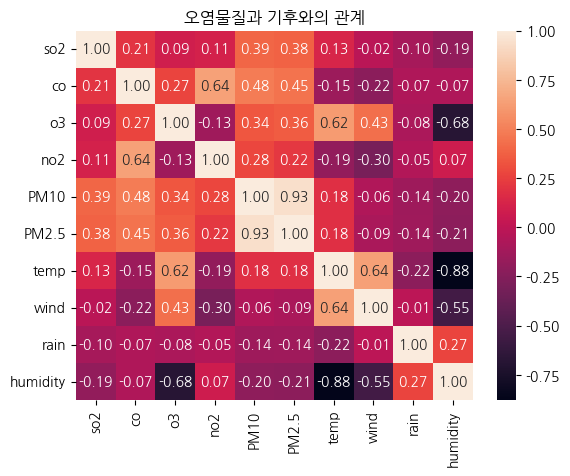

In [2]:
corr=df_num.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='rocket')
plt.title('오염물질과 기후와의 관계')
plt.show()

##### 데이터 시각화 : 히스토그램

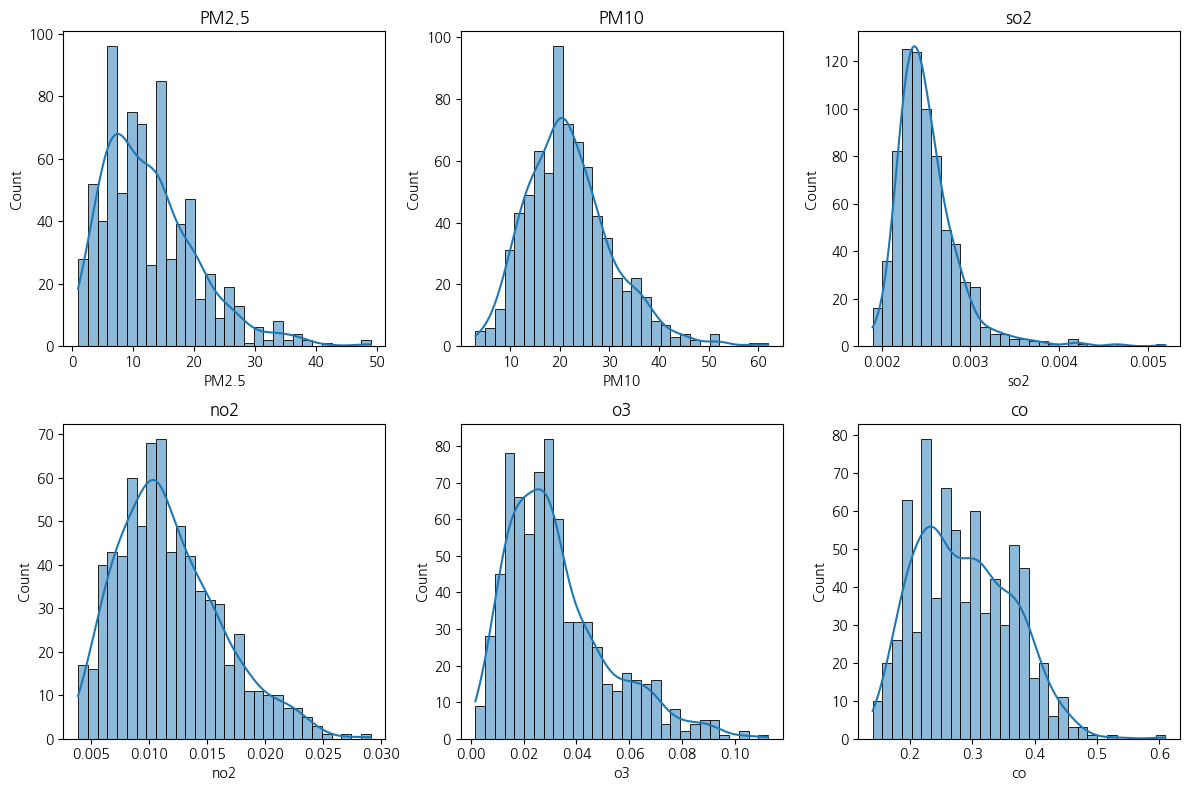

In [3]:
plt.figure(figsize=(12,8))
for i, col in enumerate(['PM2.5', 'PM10', 'so2','no2','o3','co']):
    plt.subplot(2,3,i+1)
    sns.histplot(df_num[col], kde=True, bins=30)
    plt.title(col)
# 인덱스가 (2,3,1)  (2,3,2)  (2,3,3)
#          (2,3,4)  (2,3,5)  (2,3,6)   이런 식으로 저장됨.(맨 뒷 수가 i+1의 위치)

plt.tight_layout()
plt.show()

##### PM10과 PM2.5 농도 비교

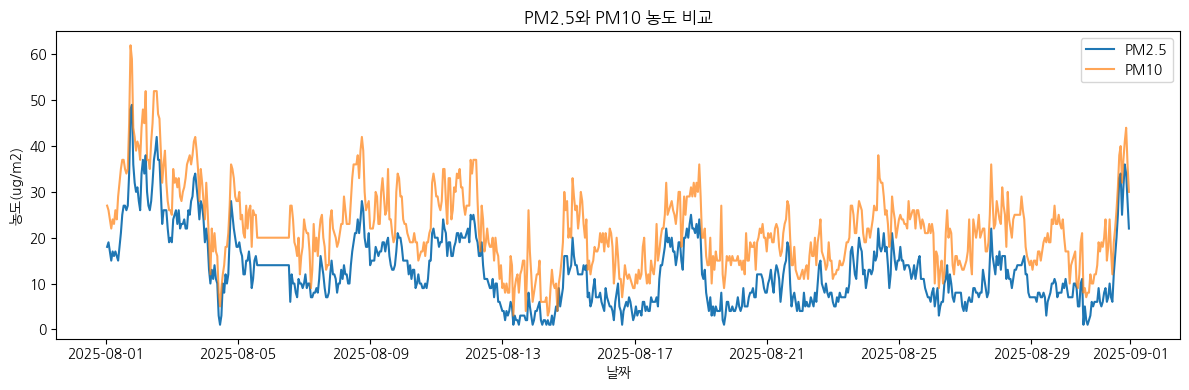

In [4]:
# 날짜별 PM2.5, PM10 농도 lineplot
plt.figure(figsize=(12,4))
sns.lineplot(data=dust_weather_df, x='date', y='PM2.5', label='PM2.5')
sns.lineplot(data=dust_weather_df, x='date', y='PM10', label='PM10', alpha=0.7)

plt.title('PM2.5와 PM10 농도 비교')
plt.xlabel('날짜')
plt.ylabel('농도(ug/m2)')
plt.legend()
plt.tight_layout()
plt.show()

##### 시간대별 미세먼지 농도 분석 1 - 이 부분이 이 파일 핵심

In [5]:
# 시간대별 PM2.5, PM10 농도 분포
date_dust_df = dust_weather_df[['date', 'PM2.5', 'PM10']].copy()
date_dust_df['hour']=date_dust_df['date'].dt.hour    # .dt.hour : 시계열데이터에서 시간 정보만 뽑아옴

print(tabulate(date_dust_df.head(), headers='keys', tablefmt='psql'))

+----+---------------------+---------+--------+--------+
|    | date                |   PM2.5 |   PM10 |   hour |
|----+---------------------+---------+--------+--------|
|  0 | 2025-08-01 01:00:00 |      18 |     27 |      1 |
|  1 | 2025-08-01 02:00:00 |      19 |     26 |      2 |
|  2 | 2025-08-01 03:00:00 |      17 |     24 |      3 |
|  3 | 2025-08-01 04:00:00 |      15 |     22 |      4 |
|  4 | 2025-08-01 05:00:00 |      17 |     24 |      5 |
+----+---------------------+---------+--------+--------+


##### 시간대별 미세먼지 농도 분석 2 - 이 부분이 이 파일 핵심

In [6]:
# 시간대별 평균 PM2.5와 PM10의 평균값 계산
hourly_pm_avg=date_dust_df.groupby('hour')[['PM2.5', 'PM10']].mean()    # 'hour'가 index가 됨
print(tabulate(hourly_pm_avg.head(), headers='keys', tablefmt='psql'))    # 각 시간대별 평균값 출력됨

+--------+---------+---------+
|   hour |   PM2.5 |    PM10 |
|--------+---------+---------|
|      0 | 11.6    | 20.3667 |
|      1 | 12.6452 | 21.6774 |
|      2 | 12.0968 | 20.6129 |
|      3 | 13.1613 | 22.2903 |
|      4 | 11.5806 | 20.1613 |
+--------+---------+---------+


##### 시간대별 PM2.5와 PM10 농도 비교

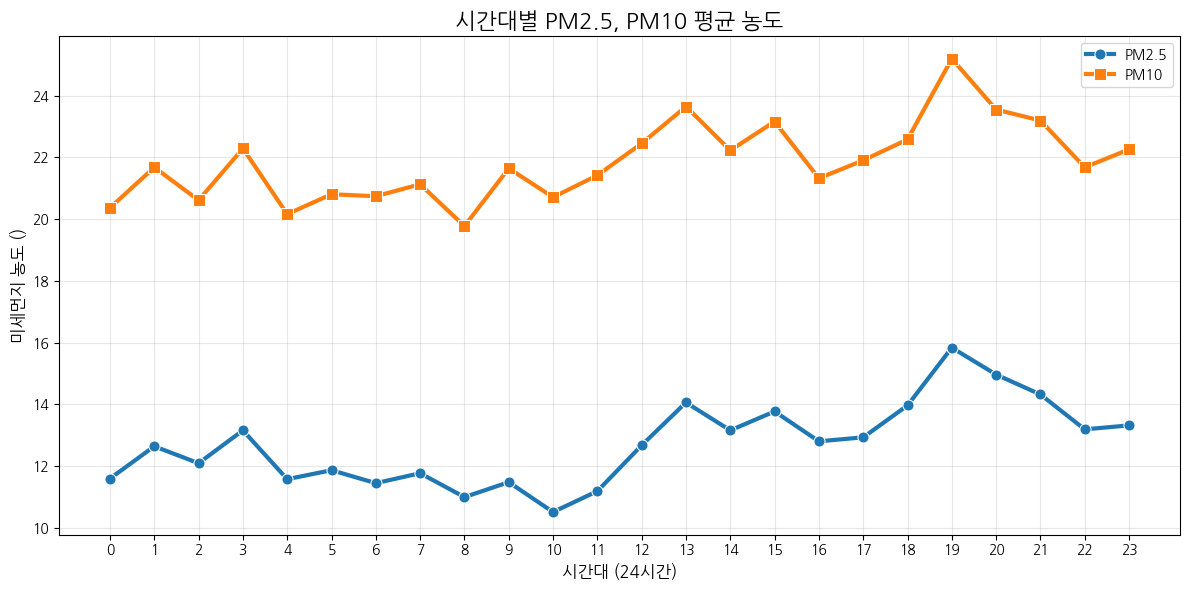

In [7]:
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_pm_avg, x='hour', y='PM2.5', label='PM2.5',
             marker='o', linewidth=3, markersize=8)
sns.lineplot(data=hourly_pm_avg, x='hour', y='PM10', label='PM10',
             marker='s', linewidth=3, markersize=8)

plt.title('시간대별 PM2.5, PM10 평균 농도', fontsize=16)
plt.xlabel('시간대 (24시간)', fontsize=12)
plt.ylabel('미세먼지 농도 ()', fontsize=12)
plt.xticks(range(0,24))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend()
plt.show()

##### PM2.5 AQI 등급에 따른 countplot

                 date  PM2.5  PM10  hour pm_level
0 2025-08-01 01:00:00     18    27     1       보통
1 2025-08-01 02:00:00     19    26     2       보통
2 2025-08-01 03:00:00     17    24     3       보통
3 2025-08-01 04:00:00     15    22     4       좋음
4 2025-08-01 05:00:00     17    24     5       보통


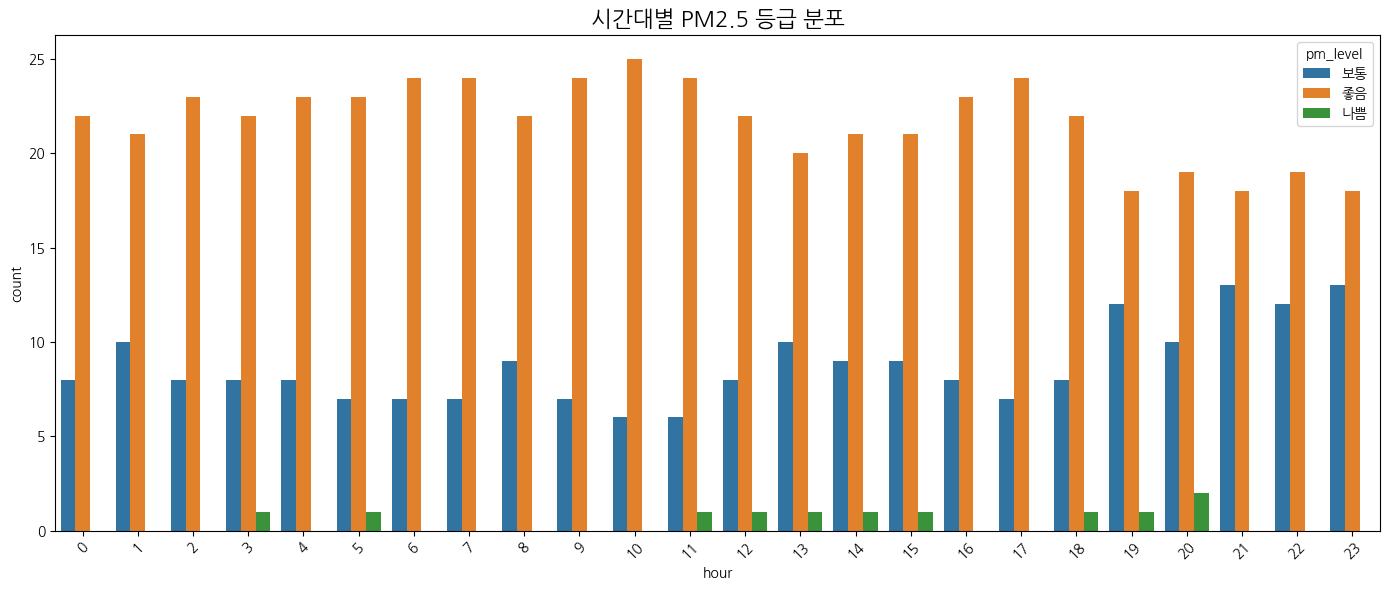

In [8]:
# PM2.5 농도를 AQI 등급으로 변환(예시)
def pm25_to_aqi(pm):
    if pm <= 15: return '좋음'
    elif pm <= 35: return '보통'
    elif pm <=75: return '나쁨'
    else: return '매우나쁨'

date_dust_df['pm_level'] = date_dust_df['PM2.5'].apply(pm25_to_aqi)
print(date_dust_df.head())

plt.figure(figsize=(14,6))
sns.countplot(data=date_dust_df, x='hour', hue='pm_level')
plt.title('시간대별 PM2.5 등급 분포', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()